# Classification : LogisticRegression


## 1.환경준비

### (1) import

In [203]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### (2) 데이터 준비

In [204]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Graduate_apply.csv"
data = pd.read_csv(path)
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## 2.데이터 전처리

### (1) x, y 분할

In [205]:
target = 'admit'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (2) 가변수화

In [206]:
# rank 는 보기에는 숫자이지만 범주형 데이터이므로 가변수화
cat_cols = ['rank']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)
# 선형/로지스틱 회귀 모델은 다중 공선성 문제 때문에 가변수화해야 함.

### (3) 데이터분할 : train, val

In [207]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

## 3.모델링
* 모델 선언
* 학습
* 예측
* 성능 검증

In [208]:
# 모델링을 위해
from sklearn.linear_model import LogisticRegression

# 평가를 위해.
from sklearn.metrics import * # 평가지표 모두 가져오기

### (1) 선언
모델링을 어떻게 할 것인지 설정, 선언

In [209]:
model = LogisticRegression()

### (2) 모델링(학습)

In [210]:
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


* 모델의 coeficient, intercept 확인

In [211]:
list(x_train)

['gre', 'gpa', 'rank_2', 'rank_3', 'rank_4']

In [212]:
print(f"coeficient: {model.coef_}, intercept: {model.intercept_}")
# f(x) = 0.035*gre + 0.644*gpa - 0.029rank_2 - 1.05*rank_3 - 0.91*rank_4

coeficient: [[ 0.00358039  0.64445664 -0.02872956 -1.05014427 -0.91151093]], intercept: [-4.60598405]


### (3) 검증 : 예측

In [213]:
pred = model.predict(x_val)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [214]:
# 예측 결과를 확률로 뽑고 싶다면... predict probability
pred_p = model.predict_proba(x_val)
pred_p[:10]

# 첫 값에서 0.51은 0.5보다 아주 약간만 큰 gray area. 0이라 하기도 애매하고 1이라 하기도 애매하다.

array([[0.51883091, 0.48116909],
       [0.6080832 , 0.3919168 ],
       [0.54826205, 0.45173795],
       [0.78828045, 0.21171955],
       [0.85975608, 0.14024392],
       [0.58377789, 0.41622211],
       [0.5604664 , 0.4395336 ],
       [0.5272615 , 0.4727385 ],
       [0.70368479, 0.29631521],
       [0.66466556, 0.33533444]])

### (4) 검증 : 평가

In [215]:
accuracy_score( y_val, pred )

0.6916666666666667

## 4.분류 모델 평가

### (1) Confusion Matrix
https://en.wikipedia.org/wiki/Confusion_matrix

In [216]:
confusion_matrix( y_val , pred)

array([[73, 11],
       [26, 10]])

### (2) classification_report
* 분류문제 평가지표 종합판
* print 문으로 결과를 출력해야 제대로 보임.

In [217]:
# classification_report(y_val , pred  )

In [218]:
print(classification_report(y_val , pred  ))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        84
           1       0.48      0.28      0.35        36

    accuracy                           0.69       120
   macro avg       0.61      0.57      0.57       120
weighted avg       0.66      0.69      0.66       120



* 참조 : confusion matrix 시각화

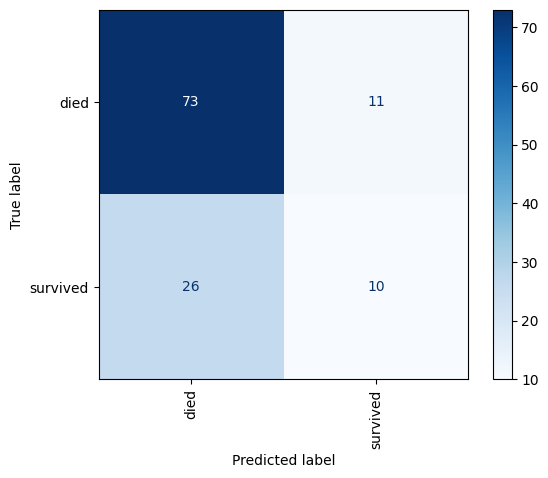

In [219]:
cm = confusion_matrix( y_val , pred  )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['died', 'survived']) # 시각화 함수
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

## 5.복습 문제 : titanic

### (1) 데이터 전처리

* url :  'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'

**[titanic_simple 데이터 셋 정보]**

- PassengerId : 승객번호
- Survived : 생존여부(1:생존, 0:사망)
- Pclass : 객실등급(1:1등급, 2:2등급, 3:3등급)
- Name : 승객이름
- Sex : 성별(male, female)
- Age : 나이
- Fare : 운임($)
- Embarked : 승선지역(Southhampton, Cherbourg, Queenstown)

#### 1) 데이터 로딩

In [220]:
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv')
data.dropna(inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


#### 2) 불필요한 변수 제거

In [221]:
data.drop(columns=['PassengerId', 'Name'], inplace=True)

#### 3) x,y 분할

In [222]:
target = 'Survived'
x = data.drop(target, axis=1)
y = data.loc[:, target]

#### 4) 가변수화

In [223]:
cat_cols = ['Sex', 'Embarked']
x = pd.get_dummies(x, columns=cat_cols, drop_first=True)

features_x = x[['Pclass', 'Age', 'Sex_male']]

#### 5) train, val 분할

In [224]:
x_train, x_val, y_train, y_val = train_test_split(features_x, y, test_size=0.3)

### (2) 모델링

* 모델 선언
* 학습
* 예측
* 성능 검증

#### 1) 모델 선언

In [225]:
model = LogisticRegression()

#### 2) 학습

In [226]:
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### 3) 예측

In [227]:
pred = model.predict(x_val)
pred_p = model.predict_proba(x_val)

#### 4) 검증평가
만든 모델은 얼마나 정확한지 검증해 봅시다.



coeficient: [[-1.25506165 -0.04104574 -2.3261078 ]], intercept: [5.1224985]
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       131
           1       0.70      0.84      0.77        83

    accuracy                           0.80       214
   macro avg       0.79      0.81      0.79       214
weighted avg       0.81      0.80      0.80       214



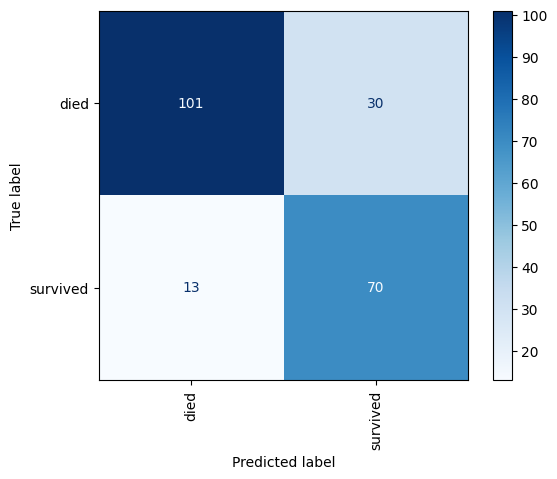

' 분류 결과\n재현율(Recall) = 0.\n\n'

In [ ]:
# coeficient들과 intercept 확인

print(f"coeficient: {model.coef_}, intercept: {model.intercept_}")
# -> coeficient: [[-1.30448297 -0.04314078 -2.32834673]], intercept: [5.0259504]

# confusion matrix 시각화
confusion_matrix( y_val , pred)

# classification_report -> 분류문제 평가
print(classification_report(y_val , pred))
cm = confusion_matrix( y_val , pred  )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['died', 'survived']) # 시각화 함수
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

''' 분류 결과 (생존자(1) 판별 기준)
모델의 민감도는 생존자 쪽에서 더 높았고, 정밀도는 사망자 쪽에서 더 높았음
precision과 recall의 조화평균인 f1-score는 사망자 쪽에서 더 높았음



'''
